In [ ]:
# Checkout www.pygimli.org for more examples


# Building a hybrid mesh in 2D

In some cases, the modelling domain may require flexibility in one region and
equidistant structure in another. In this short example, we demonstrate how to
accomplish this for a two-dimensional mesh consisting of a region with regularly
spaced quadrilaterals and a region with unstructured triangles.


We start by importing numpy, matplotlib and pygimli with its required components.



In [1]:
import numpy as np

import pygimli as pg
import pygimli.meshtools as mt

We continue by building a regular grid and assign the marker 2 to all cells.



Mesh: Nodes: 169 Cells: 144 Boundaries: 312


(<Axes: >, None)

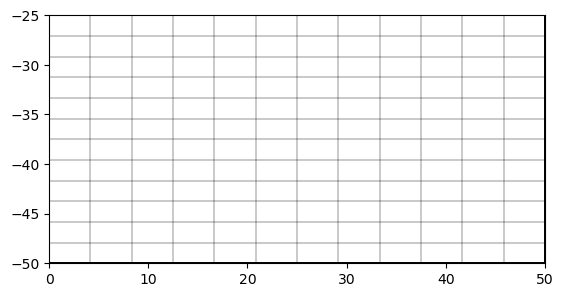

In [3]:
xmin, xmax = 0., 50.
zmin, zmax = -50., -25.

xreg = np.linspace(xmin, xmax, 13)
zreg = np.linspace(zmin, zmax, 13)

mesh1 = mt.createGrid(xreg, zreg, marker=2)
mesh1.setCellMarkers([2]*mesh1.cellCount())
print(mesh1)
pg.show(mesh1)

Next, we build an unstructured region on top by creating the polygon and
calling triangle via pygimli's TriangleWrapper.



Mesh: Nodes: 52 Cells: 77 Boundaries: 128


(<Axes: >, None)

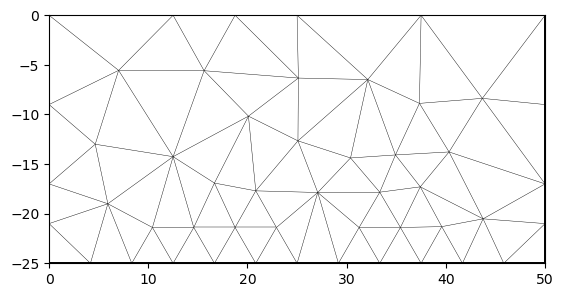

In [5]:
poly = pg.Mesh(2)  # empty 2d mesh
nStart = poly.createNode(xmin, zmax, 0.0)

nA = nStart
for x in xreg[1:]:
    nB = poly.createNode(x, zmax, 0.0)
    poly.createEdge(nA, nB)
    nA = nB

z2 = 0.
nA = poly.createNode(xmax, z2, 0.0)
poly.createEdge(nB, nA)
nB = poly.createNode(xmin, z2, 0.0)
poly.createEdge(nA, nB)
poly.createEdge(nB, nStart)

mesh2 = mt.createMesh(poly, quality=31)
mesh2.setCellMarkers([1]*mesh2.cellCount())
print(mesh2)
pg.show(mesh2)

Finally, the grid and the unstructured mesh can be merged to single mesh for
further modelling.



Mesh: Nodes: 208 Cells: 221 Boundaries: 428


(<Axes: >, None)

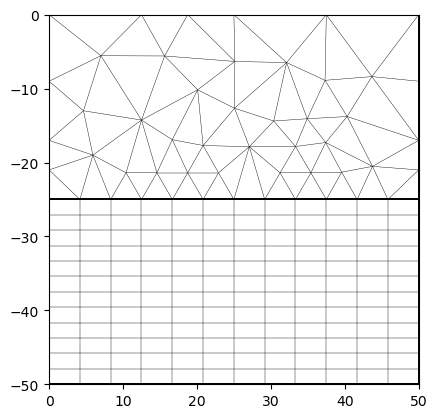

In [6]:
mesh3 = mt.mergeMeshes([mesh1, mesh2])
print(mesh3)
pg.show(mesh3)

Of course, you can treat the hybrid mesh like any other mesh and append a
triangle boundary for example with the function
:py:func:`pygimli.meshtools.grid.appendTriangleBoundary`.



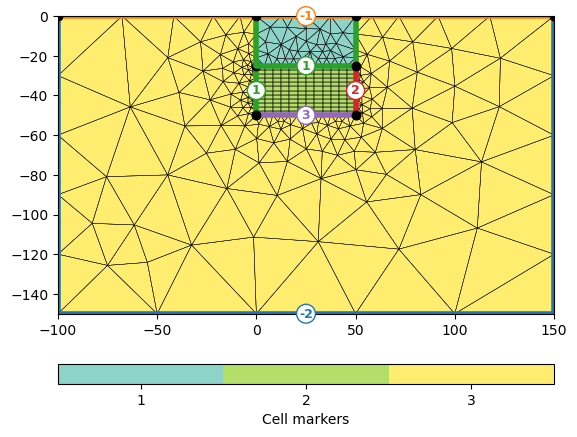

In [7]:
mesh = mt.appendTriangleBoundary(mesh3, xbound=100., ybound=100., quality=31, smooth=True,
                                 marker=3, isSubSurface=True, addNodes=5)

ax, cb = pg.show(mesh, markers=True, showMesh=True)